# Project template of 01205489

Name: ภูมิ มณีฉาย

Sec: 1

ID: 6310506731

## 1. Describe your project objective

**Objective **

  1.จำแนกระดับความน่าเชื่อของบริษัท (Rating)

  2.เปรียบเทียบความแม่นยำของโมเดลที่ใช้ในการจำแนกประเภทข้อมูล

## 2. Describe your dataset and visualization

There are 30 features for every company of which 25 are financial indicators. They can be divided in:

Liquidity Measurement Ratios: currentRatio, quickRatio, cashRatio, daysOfSalesOutstanding

Profitability Indicator Ratios: grossProfitMargin, operatingProfitMargin, pretaxProfitMargin, netProfitMargin, effectiveTaxRate, returnOnAssets, returnOnEquity, returnOnCapitalEmployed

Debt Ratios: debtRatio, debtEquityRatio

Operating Performance Ratios:` assetTurnover

Cash Flow Indicator Ratios: operatingCashFlowPerShare, freeCashFlowPerShare, cashPerShare, operatingCashFlowSalesRatio, freeCashFlowOperatingCashFlowRatio

Dataset : https://www.kaggle.com/datasets/agewerc/corporate-credit-rating

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url = 'https://raw.githubusercontent.com/Rosaleigh1/CreditRating_DeeplearnProject/main/corporate_rating.csv'
df = pd.read_csv(url)

df.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [ ]:
df.shape

(2029, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 11  pretaxProfitMargin                  2029 no

In [ ]:
df.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,...,0.397572,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,...,10.595075,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611015,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,...,0.146854,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,...,0.300539,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,...,0.370653,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


<Figure size 2000x600 with 0 Axes>

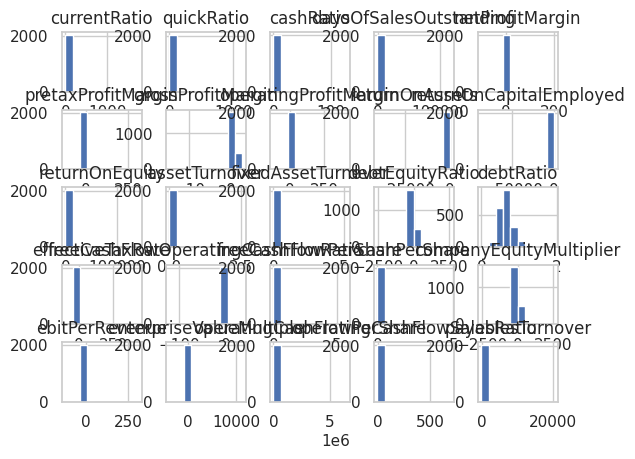

In [ ]:
cols = df.columns

plt.figure(figsize=(20, 6))
col_plot = df[cols]
col_plot.hist(bins=10)
plt.show()



In [ ]:
df.isnull().sum()

Rating                                0
Name                                  0
Symbol                                0
Rating Agency Name                    0
Date                                  0
Sector                                0
currentRatio                          0
quickRatio                            0
cashRatio                             0
daysOfSalesOutstanding                0
netProfitMargin                       0
pretaxProfitMargin                    0
grossProfitMargin                     0
operatingProfitMargin                 0
returnOnAssets                        0
returnOnCapitalEmployed               0
returnOnEquity                        0
assetTurnover                         0
fixedAssetTurnover                    0
debtEquityRatio                       0
debtRatio                             0
effectiveTaxRate                      0
freeCashFlowOperatingCashFlowRatio    0
freeCashFlowPerShare                  0
cashPerShare                          0


In [ ]:
df['Rating'].value_counts().sort_values()

D        1
C        2
CC       5
AAA      7
CCC     64
AA      89
B      302
A      398
BB     490
BBB    671
Name: Rating, dtype: int64

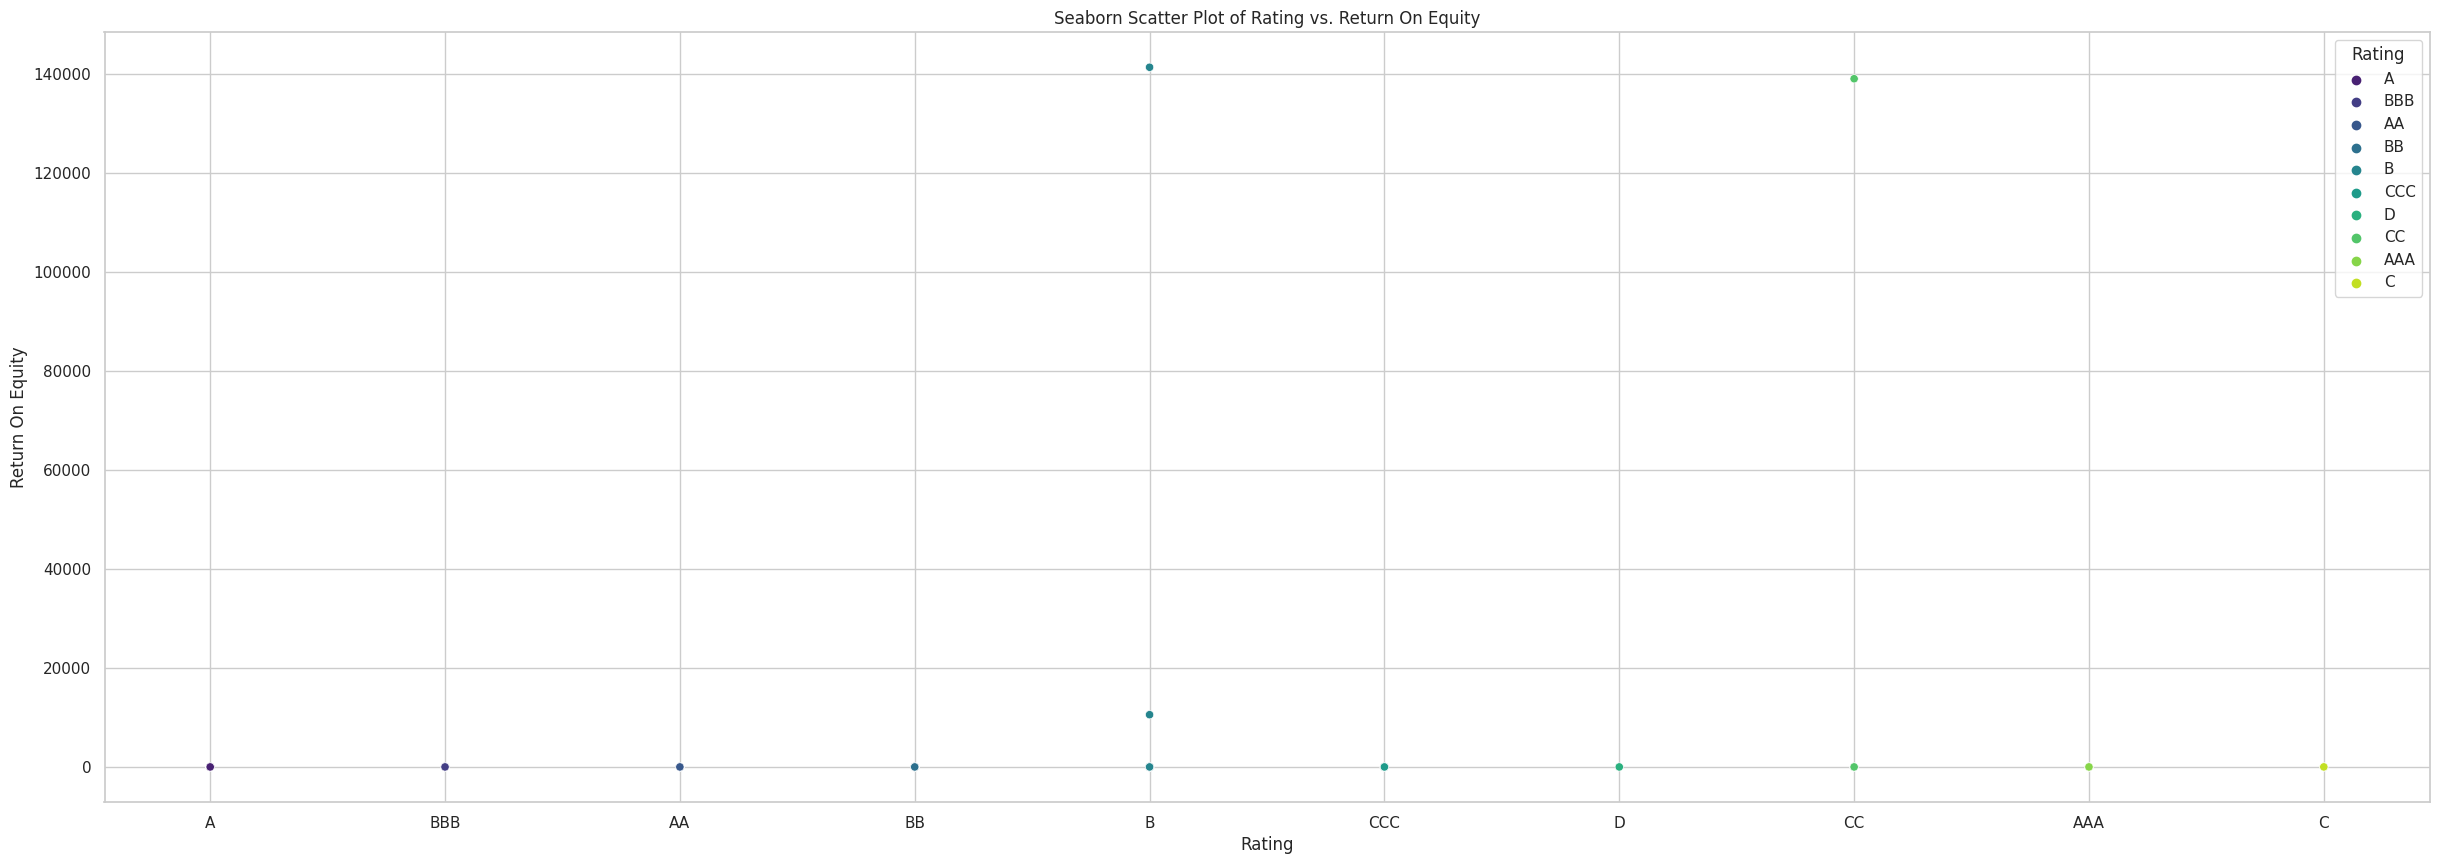

In [ ]:
plt.figure(figsize=(30, 10))
sns.scatterplot(data=df, x='Rating', y='returnOnEquity', hue='Rating',palette='viridis')

plt.title('Seaborn Scatter Plot of Rating vs. Return On Equity')
plt.xlabel('Rating')
plt.ylabel('Return On Equity')

plt.legend(title='Rating')

plt.show()

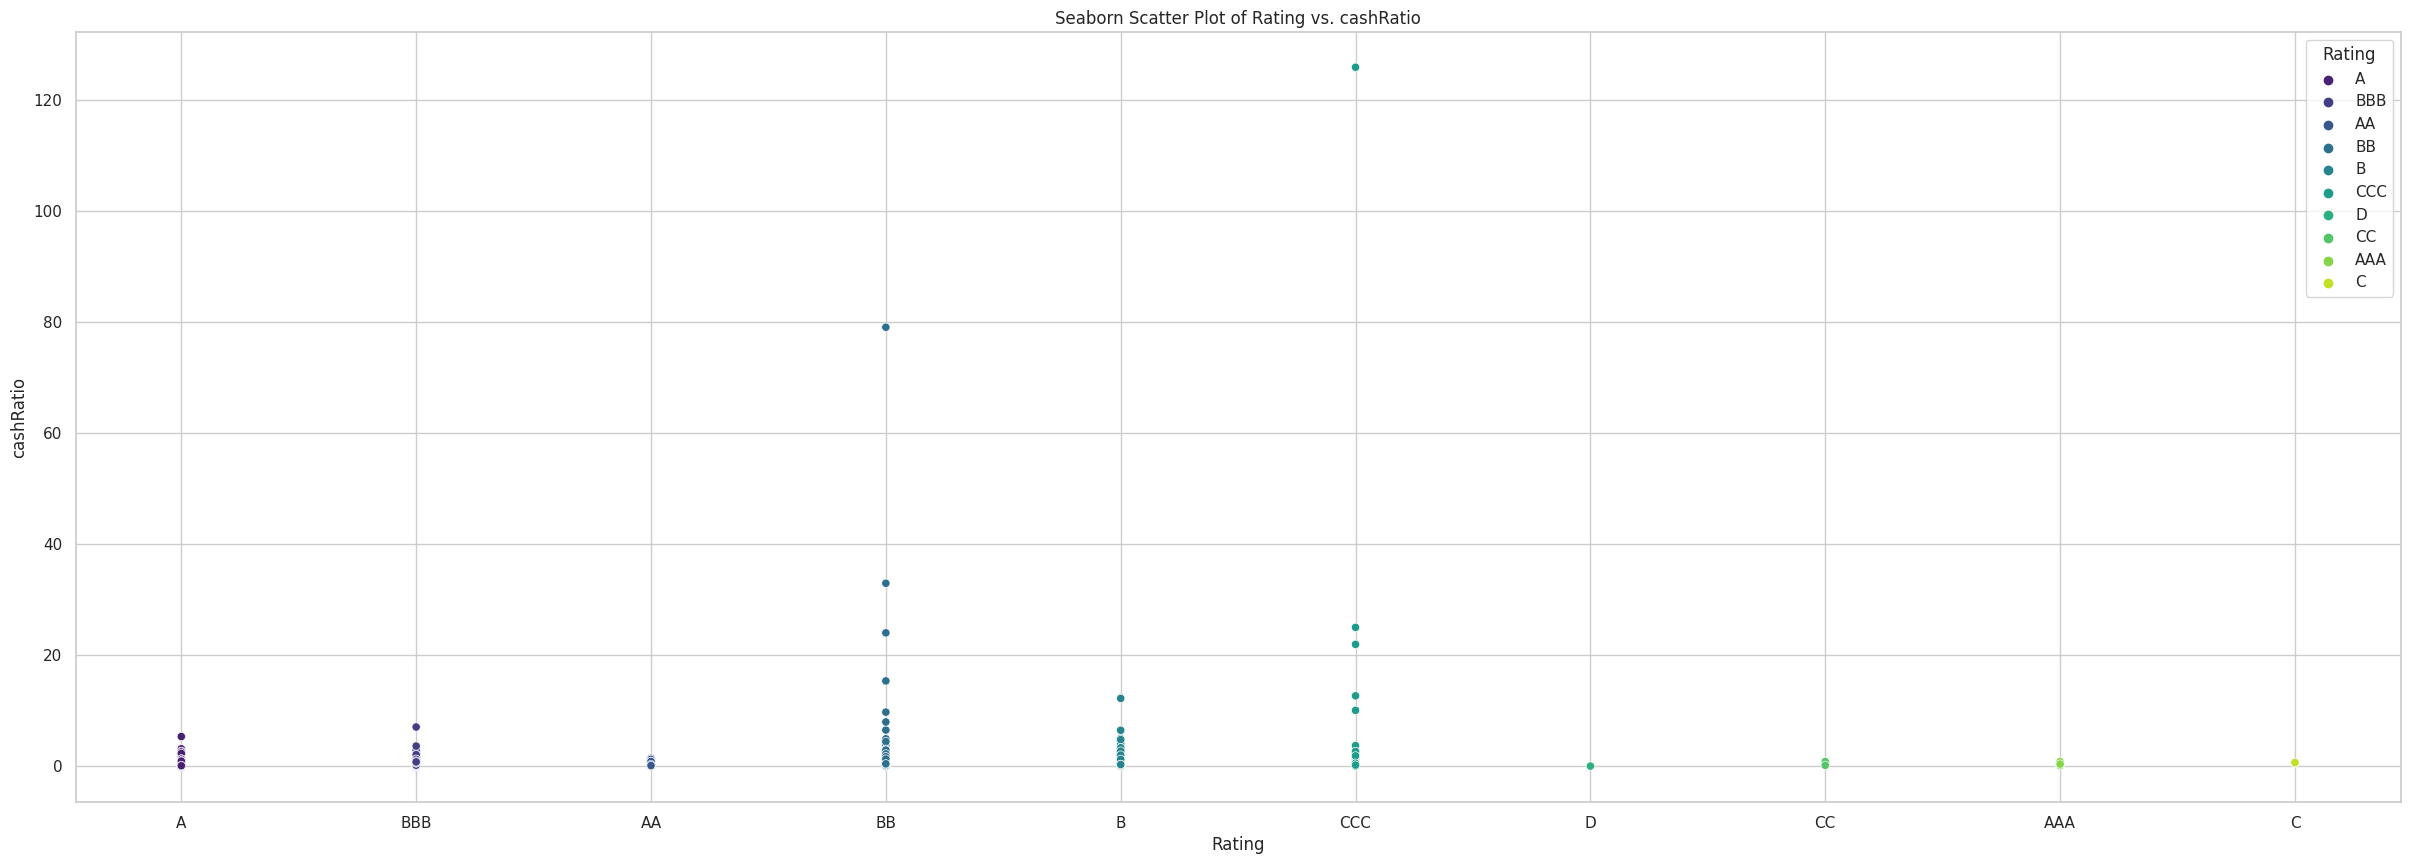

In [ ]:
plt.figure(figsize=(30, 10))
sns.scatterplot(data=df, x='Rating', y='cashRatio', hue='Rating',palette='viridis')

plt.title('Seaborn Scatter Plot of Rating vs. cashRatio')
plt.xlabel('Rating')
plt.ylabel('cashRatio')

plt.legend(title='Rating')

plt.show()

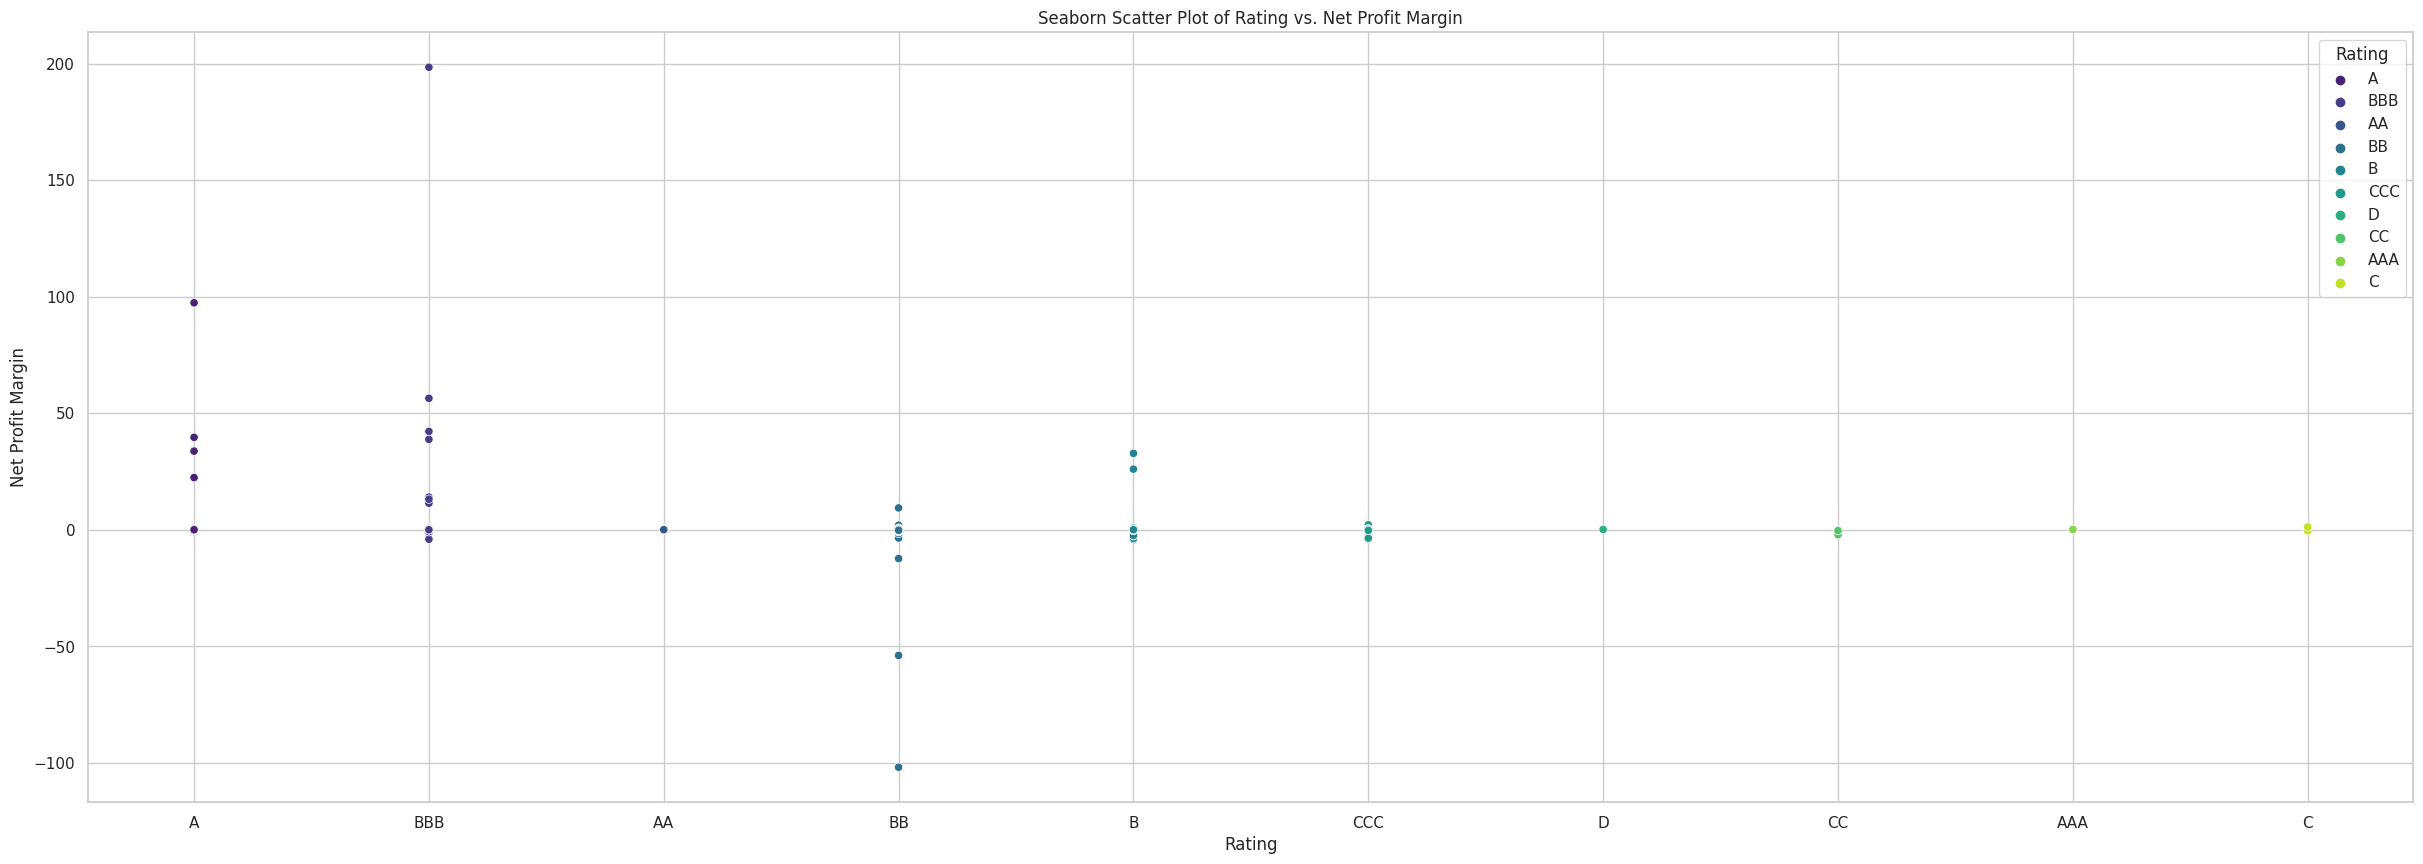

In [ ]:
plt.figure(figsize=(30, 10))
sns.scatterplot(data=df, x='Rating', y='netProfitMargin', hue='Rating',palette='viridis')

plt.title('Seaborn Scatter Plot of Rating vs. Net Profit Margin')
plt.xlabel('Rating')
plt.ylabel('Net Profit Margin')

plt.legend(title='Rating')

plt.show()

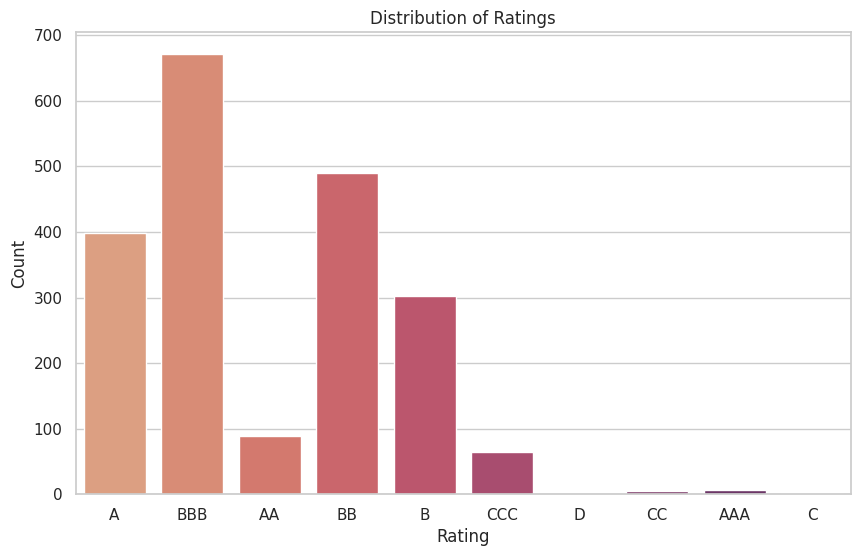

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df,palette='flare')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()

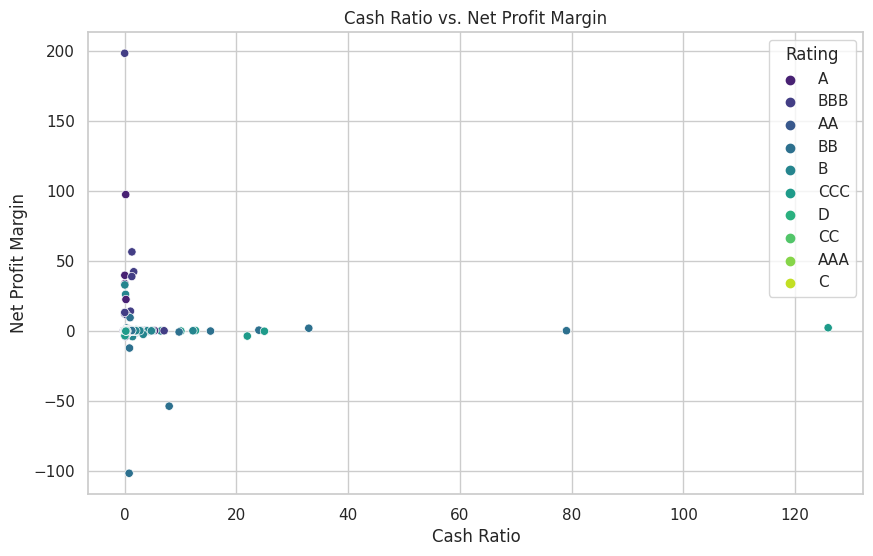

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cashRatio', y='netProfitMargin', hue='Rating',palette='viridis')

plt.title('Cash Ratio vs. Net Profit Margin')
plt.xlabel('Cash Ratio')
plt.ylabel('Net Profit Margin')

plt.legend(title='Rating')

plt.show()

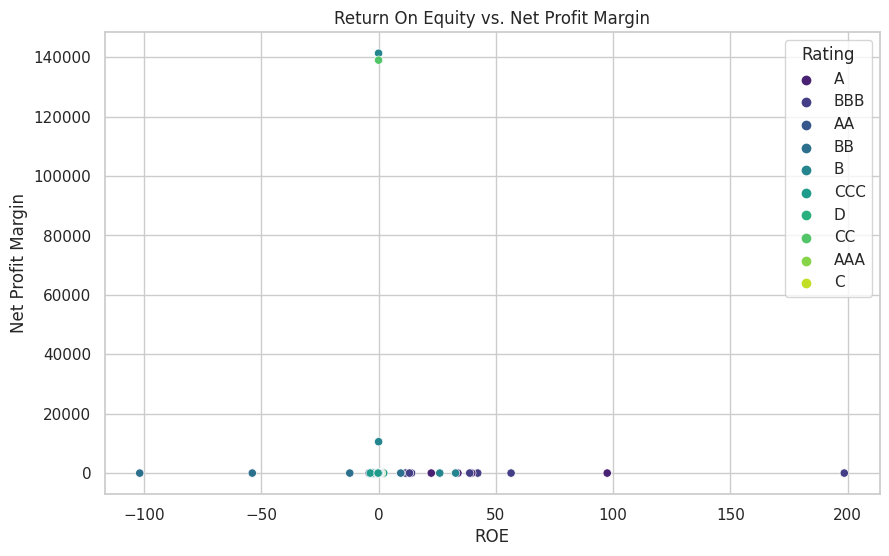

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='returnOnEquity', x='netProfitMargin', hue='Rating',palette='viridis')

plt.title('Return On Equity vs. Net Profit Margin')
plt.xlabel('ROE')
plt.ylabel('Net Profit Margin')

plt.legend(title='Rating')

plt.show()

## 3. Diagram or flowchart to describe your procedure to solve the problem

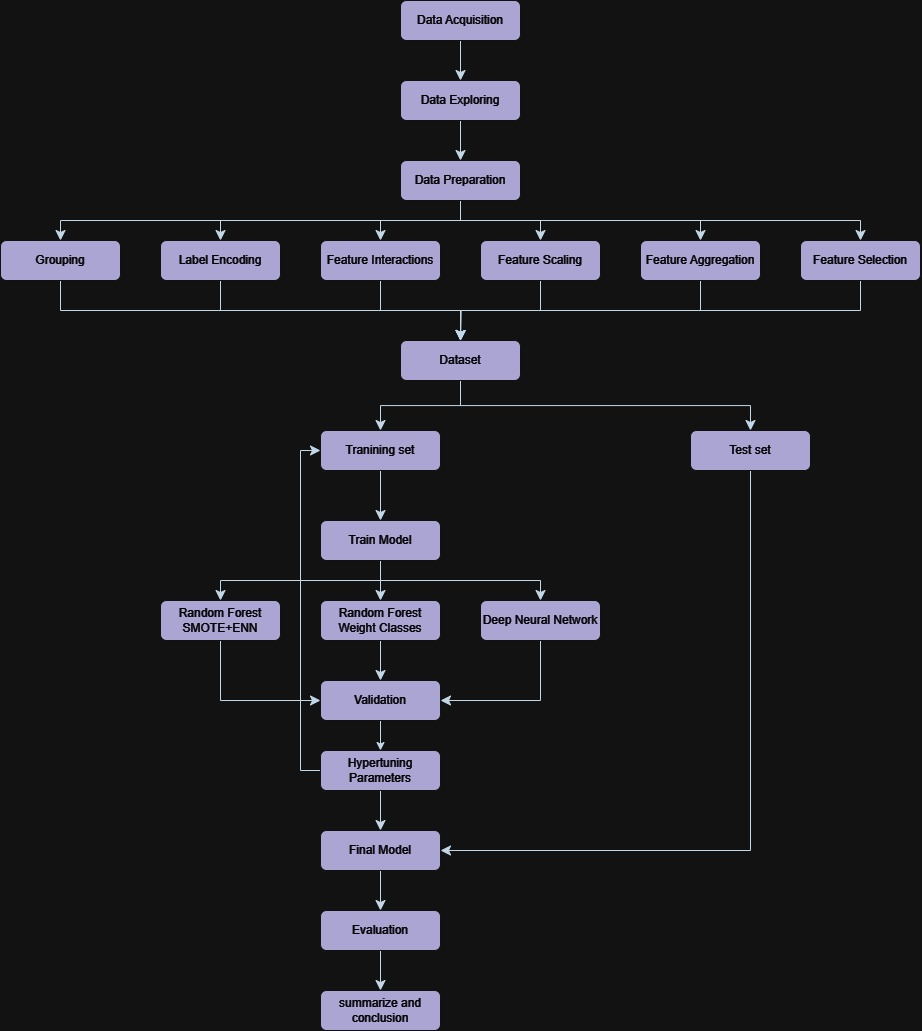

## 4. Detail for each step of the above diagram

### Datapreparation

### Grouping

In [ ]:
df['Rating'].replace(['D', 'C', 'CC'], 'Unranked', inplace=True)

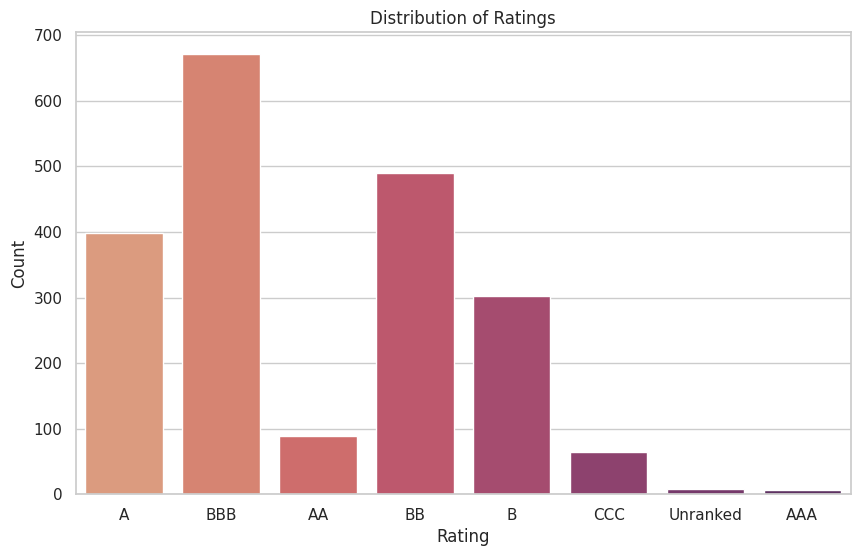

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df,palette='flare')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()

In [ ]:
df['Rating'].value_counts()

BBB         671
BB          490
A           398
B           302
AA           89
CCC          64
Unranked      8
AAA           7
Name: Rating, dtype: int64

In [ ]:
df.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


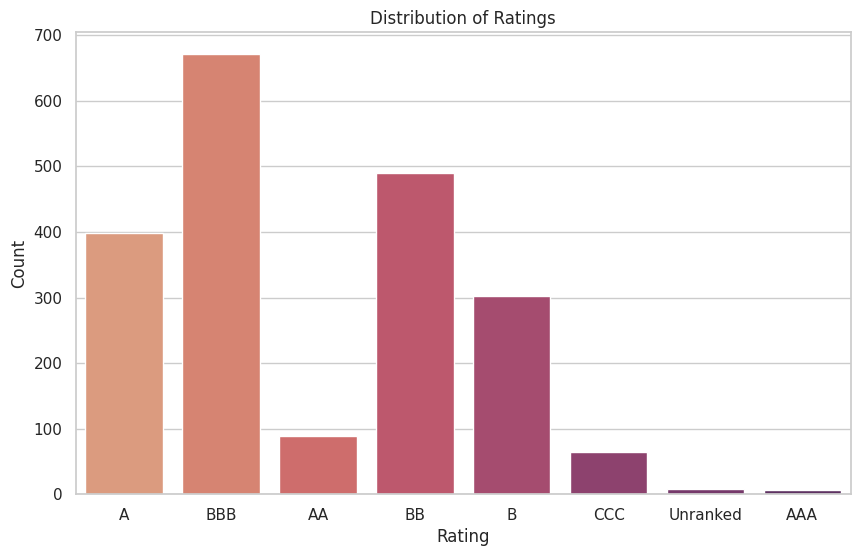

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df,palette='flare')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()

In [ ]:
df.isnull().sum()

Rating                                0
Name                                  0
Symbol                                0
Rating Agency Name                    0
Date                                  0
Sector                                0
currentRatio                          0
quickRatio                            0
cashRatio                             0
daysOfSalesOutstanding                0
netProfitMargin                       0
pretaxProfitMargin                    0
grossProfitMargin                     0
operatingProfitMargin                 0
returnOnAssets                        0
returnOnCapitalEmployed               0
returnOnEquity                        0
assetTurnover                         0
fixedAssetTurnover                    0
debtEquityRatio                       0
debtRatio                             0
effectiveTaxRate                      0
freeCashFlowOperatingCashFlowRatio    0
freeCashFlowPerShare                  0
cashPerShare                          0


In [ ]:
print(df['Rating'].unique())

['A' 'BBB' 'AA' 'BB' 'B' 'CCC' 'Unranked' 'AAA']


Feature Engineering

Split Date time

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['quarter'] = df['Date'].dt.quarter
#df=df.drop(columns = 'Date')

In [ ]:
df.head(3)


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,year,month,day,quarter
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2015-11-27,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655,2015,11,27,4
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2014-02-13,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846,2014,2,13,1
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,2015-03-06,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510,2015,3,6,1


### Label Encoding

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Name']= label_encoder.fit_transform(df['Name'])
df['Symbol']= label_encoder.fit_transform(df['Symbol'])
df['Rating Agency Name']= label_encoder.fit_transform(df['Rating Agency Name'])
df['Sector']= label_encoder.fit_transform(df['Sector'])

In [ ]:
df.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,year,month,day,quarter
0,A,578,566,1,2015-11-27,2,0.945894,0.426395,0.099690,44.203245,...,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655,2015,11,27,4
1,BBB,578,566,1,2014-02-13,2,1.033559,0.498234,0.203120,38.991156,...,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846,2014,2,13,1
2,BBB,578,566,2,2015-03-06,2,0.963703,0.451505,0.122099,50.841385,...,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510,2015,3,6,1
3,BBB,578,566,2,2012-06-15,2,1.019851,0.510402,0.176116,41.161738,...,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150,2012,6,15,2
4,BBB,578,566,4,2016-10-24,2,0.957844,0.495432,0.141608,47.761126,...,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790,2016,10,24,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Rating                              2029 non-null   object        
 1   Name                                2029 non-null   int64         
 2   Symbol                              2029 non-null   int64         
 3   Rating Agency Name                  2029 non-null   int64         
 4   Date                                2029 non-null   datetime64[ns]
 5   Sector                              2029 non-null   int64         
 6   currentRatio                        2029 non-null   float64       
 7   quickRatio                          2029 non-null   float64       
 8   cashRatio                           2029 non-null   float64       
 9   daysOfSalesOutstanding              2029 non-null   float64       
 10  netProfitMargin         

In [ ]:
Liquidity_Rt = ['currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding']
Profitable_Rt = ['grossProfitMargin', 'operatingProfitMargin', 'pretaxProfitMargin', 'netProfitMargin', 'effectiveTaxRate', 'returnOnAssets', 'returnOnEquity', 'returnOnCapitalEmployed']
Debt_Rt = ['debtRatio', 'debtEquityRatio']
Operating_Rt = ['assetTurnover']
Cash_Rt = ['operatingCashFlowPerShare', 'freeCashFlowPerShare', 'cashPerShare', 'operatingCashFlowSalesRatio', 'freeCashFlowOperatingCashFlowRatio']


In [ ]:
#df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
#df['day_of_week'] = df['date'].dt.dayofweek
#df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

In [ ]:
df['sum_liq'] = df['currentRatio']+df['quickRatio'] +df['cashRatio']+df['daysOfSalesOutstanding']
df['sum_profit']  = df['grossProfitMargin']+df['operatingProfitMargin']+df['pretaxProfitMargin']+df['netProfitMargin']+df['effectiveTaxRate']+df['returnOnAssets']+df['returnOnEquity']+df['returnOnCapitalEmployed']
df['sum_debt'] = df['debtRatio']+df['debtEquityRatio']
df['sum_cash'] = df['operatingCashFlowPerShare']+df['freeCashFlowPerShare']+df['cashPerShare']+df['operatingCashFlowSalesRatio']+df['freeCashFlowOperatingCashFlowRatio']

In [ ]:
df.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,operatingCashFlowSalesRatio,payablesTurnover,year,month,day,quarter,sum_liq,sum_profit,sum_debt,sum_cash
0,A,578,566,1,2015-11-27,2,0.945894,0.426395,0.099690,44.203245,...,0.058638,3.906655,2015,11,27,4,45.675224,0.825477,3.758512,32.681703
1,BBB,578,566,1,2014-02-13,2,1.033559,0.498234,0.203120,38.991156,...,0.067239,4.002846,2014,2,13,1,40.726069,0.735292,2.840005,42.551228
2,BBB,578,566,2,2015-03-06,2,0.963703,0.451505,0.122099,50.841385,...,0.074426,3.483510,2015,3,6,1,52.378693,0.763710,3.850350,42.273435
3,BBB,578,566,2,2012-06-15,2,1.019851,0.510402,0.176116,41.161738,...,0.028394,4.581150,2012,6,15,2,42.868106,2.097146,3.355539,20.206745
4,BBB,578,566,4,2016-10-24,2,0.957844,0.495432,0.141608,47.761126,...,0.058065,3.857790,2016,10,24,4,49.356009,0.836026,3.763576,37.710488


Liquidity Measurement Ratios: currentRatio, quickRatio, cashRatio, daysOfSalesOutstanding

Profitability Indicator Ratios: grossProfitMargin, operatingProfitMargin, pretaxProfitMargin, netProfitMargin, effectiveTaxRate, returnOnAssets, returnOnEquity, returnOnCapitalEmployed

Debt Ratios: debtRatio, debtEquityRatio

Operating Performance Ratios:` assetTurnover

Cash Flow Indicator Ratios: operatingCashFlowPerShare, freeCashFlowPerShare, cashPerShare, operatingCashFlowSalesRatio, freeCashFlowOperatingCashFlowRatio

### Feature Interactions

In [ ]:
df['isRoe15'] = np.where(df['returnOnEquity'] > 0.15, 1, 0)
df['roe_quantile'] = pd.qcut(df['returnOnEquity'], q=4, labels=False)
df['roe_quantile'].value_counts()

0    508
2    507
1    507
3    507
Name: roe_quantile, dtype: int64

In [ ]:
df['isRoe15'].value_counts()

0    1228
1     801
Name: isRoe15, dtype: int64

### Feature Aggregation

In [ ]:
data_agg = df.groupby(['Rating']).agg({'netProfitMargin': ['mean', 'max', 'min', 'std']})
data_agg.columns=[i[1] for i in list(data_agg.columns)]
df = df.merge(data_agg, on='Rating', how='left')
column_name_mapping = {
    'mean': 'netProfitMargin_mean',
    'max': 'netProfitMargin_max',
    'min': 'netProfitMargin_min',
    'std': 'netProfitMargin_std'
    }

df.rename(columns=column_name_mapping, inplace=True)

df['netProfitMargin_diff'] = df['netProfitMargin_max'] - df['netProfitMargin_min']
df.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,sum_profit,sum_debt,sum_cash,isRoe15,roe_quantile,netProfitMargin_mean,netProfitMargin_max,netProfitMargin_min,netProfitMargin_std,netProfitMargin_diff
0,A,578,566,1,2015-11-27,2,0.945894,0.426395,0.099690,44.203245,...,0.825477,3.758512,32.681703,1,2,0.590435,97.451045,-0.627324,5.631448,98.078369
1,BBB,578,566,1,2014-02-13,2,1.033559,0.498234,0.203120,38.991156,...,0.735292,2.840005,42.551228,1,2,0.641484,198.517873,-4.002253,8.312669,202.520126
2,BBB,578,566,2,2015-03-06,2,0.963703,0.451505,0.122099,50.841385,...,0.763710,3.850350,42.273435,0,2,0.641484,198.517873,-4.002253,8.312669,202.520126
3,BBB,578,566,2,2012-06-15,2,1.019851,0.510402,0.176116,41.161738,...,2.097146,3.355539,20.206745,0,1,0.641484,198.517873,-4.002253,8.312669,202.520126
4,BBB,578,566,4,2016-10-24,2,0.957844,0.495432,0.141608,47.761126,...,0.836026,3.763576,37.710488,1,2,0.641484,198.517873,-4.002253,8.312669,202.520126


data_agg

### Feature Scaling

In [ ]:
df.columns

Index(['Rating', 'Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector',
       'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover', 'year', 'month',
       'day', 'quarter', 'sum_liq', 'sum_profit', 'sum_debt', 'sum_cash',
       'isRoe15', 'roe_quantile', 'netProfitMargin_mean',
       'netProfitMargin_max', 'netProfitMargin_min', 'netProfitMargin_std',
       'netProfitMargin_diff'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_norm = [
       'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover','sum_liq',
       'sum_profit', 'sum_debt', 'sum_cash',
       'isRoe15', 'roe_quantile', 'netProfitMargin_mean',
       'netProfitMargin_max', 'netProfitMargin_min', 'netProfitMargin_std',
       'netProfitMargin_diff']
df[columns_to_norm] = scaler.fit_transform(df[columns_to_norm])

In [ ]:
df.sample()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,sum_profit,sum_debt,sum_cash,isRoe15,roe_quantile,netProfitMargin_mean,netProfitMargin_max,netProfitMargin_min,netProfitMargin_std,netProfitMargin_diff
1565,CCC,515,511,3,2012-06-15,1,-0.031969,-0.068106,-0.072049,-0.075065,...,-0.030529,0.005008,-0.035544,-0.807639,-1.340716,-1.362878,-1.104947,0.543842,-1.889988,-1.677098


In [ ]:
rating_mapping = {
    'Unranked': 7,
    'CCC': 6,
    'B': 5,
    'BB': 4,
    'BBB': 3,
    'A': 2,
    'AA': 1,
    'AAA': 0
    }
df['Rating'] = df['Rating'].map(rating_mapping)


In [ ]:
df['Rating'].value_counts()

3    671
4    490
2    398
5    302
1     89
6     64
7      8
0      7
Name: Rating, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2029 entries, 0 to 2028
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Rating                              2029 non-null   int64         
 1   Name                                2029 non-null   int64         
 2   Symbol                              2029 non-null   int64         
 3   Rating Agency Name                  2029 non-null   int64         
 4   Date                                2029 non-null   datetime64[ns]
 5   Sector                              2029 non-null   int64         
 6   currentRatio                        2029 non-null   float64       
 7   quickRatio                          2029 non-null   float64       
 8   cashRatio                           2029 non-null   float64       
 9   daysOfSalesOutstanding              2029 non-null   float64       
 10  netProfitMargin         

### Feature Selection

<ipython-input-188-d6c0256c982b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_correlation_matrix = df.corr()


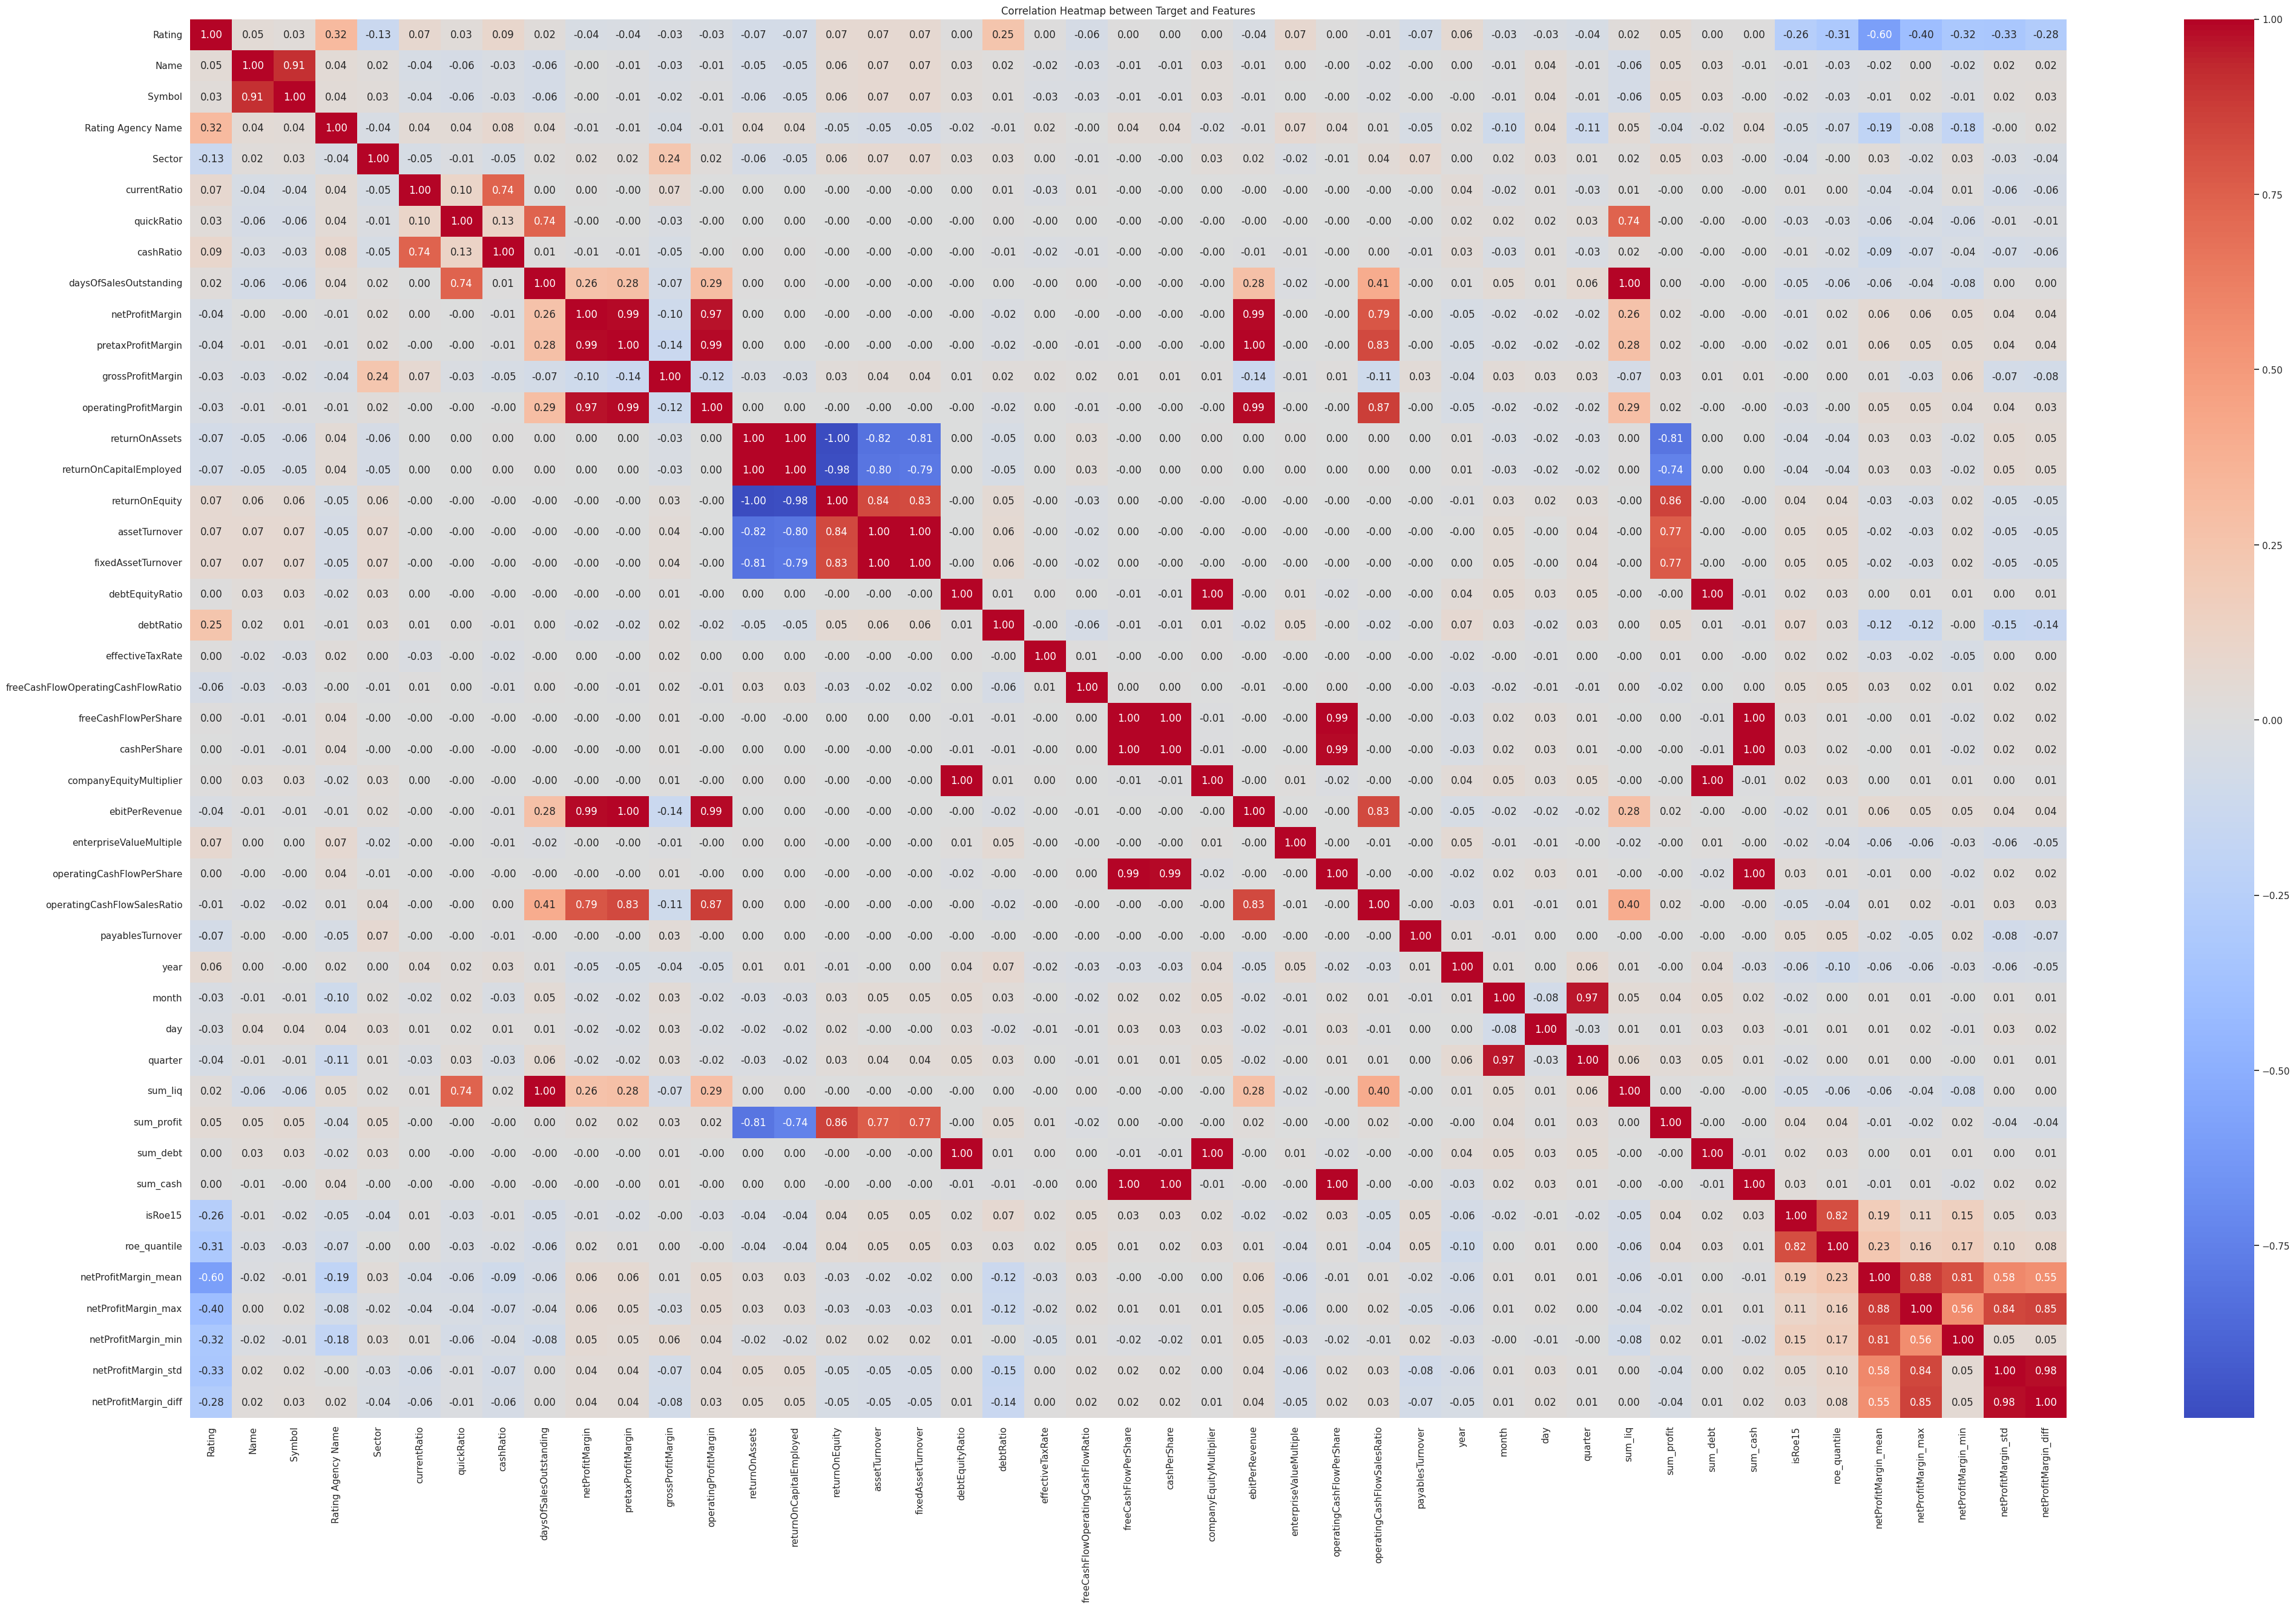

In [ ]:
new_correlation_matrix = df.corr()

plt.figure(figsize=(50, 30))
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Target and Features')
plt.show()

In [ ]:
feature_corr = df.corr()

feature_corr = feature_corr['Rating'].abs().sort_values(ascending=False)
feature_corr['Rating']

filtered_df = feature_corr[(feature_corr > 0.1)]
filtered_feature = filtered_df.index.tolist()
filtered_feature

<ipython-input-189-2a54052713c0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_corr = df.corr()


['Rating',
 'netProfitMargin_mean',
 'netProfitMargin_max',
 'netProfitMargin_std',
 'netProfitMargin_min',
 'Rating Agency Name',
 'roe_quantile',
 'netProfitMargin_diff',
 'isRoe15',
 'debtRatio',
 'Sector']

In [ ]:
feature_corr

Rating                                1.000000
netProfitMargin_mean                  0.595949
netProfitMargin_max                   0.402871
netProfitMargin_std                   0.326423
netProfitMargin_min                   0.323733
Rating Agency Name                    0.320533
roe_quantile                          0.310370
netProfitMargin_diff                  0.282792
isRoe15                               0.258358
debtRatio                             0.251527
Sector                                0.133853
cashRatio                             0.094615
enterpriseValueMultiple               0.073608
currentRatio                          0.073504
returnOnCapitalEmployed               0.073174
payablesTurnover                      0.072894
assetTurnover                         0.072443
returnOnAssets                        0.071963
fixedAssetTurnover                    0.071547
returnOnEquity                        0.069992
year                                  0.062823
freeCashFlowO

In [ ]:
df = df[filtered_feature]
df.head()

,Rating,netProfitMargin_mean,netProfitMargin_max,netProfitMargin_std,netProfitMargin_min,Rating Agency Name,roe_quantile,netProfitMargin_diff,isRoe15,debtRatio,Sector
0,2,0.799986,0.066758,0.043976,0.617228,1,0.447787,-0.307999,1.238178,0.426124,2
1,3,0.930883,1.309919,1.122844,0.537590,1,0.447787,1.243765,1.238178,0.104020,2
2,3,0.930883,1.309919,1.122844,0.537590,2,0.447787,1.243765,-0.807639,0.451378,2
3,3,0.930883,1.309919,1.122844,0.537590,2,-0.446464,1.243765,-0.807639,0.302077,2
4,3,0.930883,1.309919,1.122844,0.537590,4,0.447787,1.243765,1.238178,0.427544,2


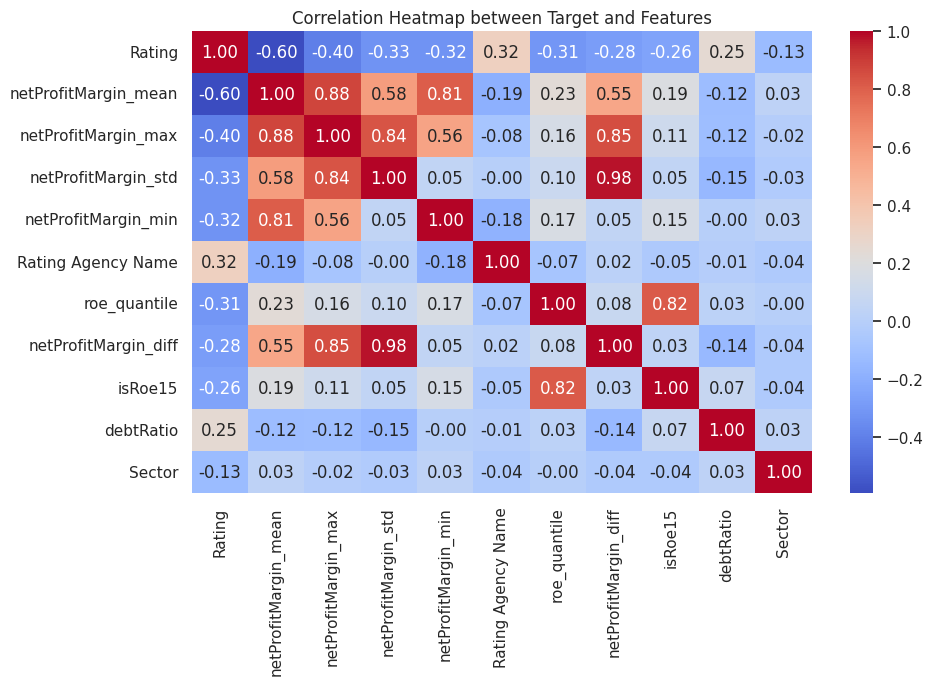

In [ ]:
new_correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Target and Features')
plt.show()

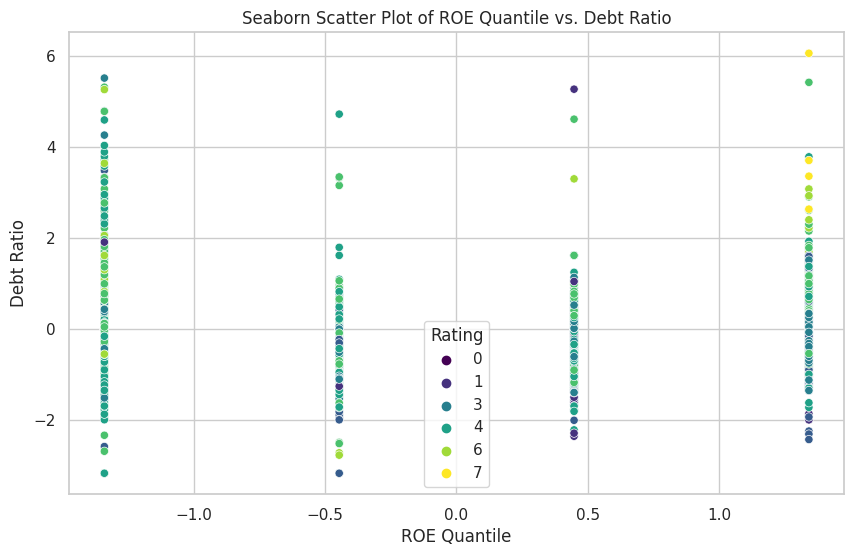

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='debtRatio', x='roe_quantile', hue='Rating',palette='viridis')

plt.title('Seaborn Scatter Plot of ROE Quantile vs. Debt Ratio')
plt.xlabel('ROE Quantile')
plt.ylabel('Debt Ratio')

plt.legend(title='Rating')

plt.show()

## 5. Detail of your model implementation

### Split Data

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(["Rating"],axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777,stratify=y)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1623, 10)
(1623,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(406, 10)
(406,)


### SMOTE-ENN

over sampling technique : https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

smote parameter : https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

enn : https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.EditedNearestNeighbours.html

In [ ]:
# SMOTE + ENN
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.datasets import make_classification


#X = df.drop(['Rating', 'Date'], axis=1)
#y = df['Rating']

smote = SMOTE(sampling_strategy='auto',random_state=1234)
enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=6, kind_sel='all')

X_resampled, y_resampled = SMOTEENN(smote=smote, enn=enn, random_state=100).fit_resample(X_train, y_train)

#print(y_resampled.value_counts())

In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)

(4195, 10)
(4195,)


In [ ]:
y_train.value_counts().sort_values()

7      6
0      6
6     51
1     71
5    242
2    318
4    392
3    537
Name: Rating, dtype: int64

In [ ]:
y_test.value_counts()

3    134
4     98
2     80
5     60
1     18
6     13
7      2
0      1
Name: Rating, dtype: int64

In [ ]:
y_resampled.value_counts().sort_values()

5    485
1    511
6    525
2    531
3    534
4    535
0    537
7    537
Name: Rating, dtype: int64

### Random Forest SMOTE-ENN

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

ranF_smotenn = RandomForestClassifier(criterion= 'gini', max_depth= 4, max_features='auto', n_estimators=100)

ranF_smotenn.fit(X_resampled,y_resampled)

y_pred_ranF_smotenn = ranF_smotenn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_ranF_smotenn)
print("Accuracy:", accuracy)

Accuracy: 1.0
CPU times: user 301 ms, sys: 2.78 ms, total: 304 ms
Wall time: 304 ms


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(ranF_smotenn, X_resampled, y_resampled, cv=5)

mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

print("Cross-Validation Mean Accuracy:", mean_accuracy)
print("Cross-Validation Standard Deviation:", std_accuracy)

Cross-Validation Mean Accuracy: 1.0
Cross-Validation Standard Deviation: 0.0


In [ ]:
classification_rep = classification_report(y_test, y_pred_ranF_smotenn)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        80
           3       1.00      1.00      1.00       134
           4       1.00      1.00      1.00        98
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         2

    accuracy                           1.00       406
   macro avg       1.00      1.00      1.00       406
weighted avg       1.00      1.00      1.00       406



### Random Forest Weights Classes

In [ ]:
weights = {
          0:10,
          1:1,
          2:1,
          3:1,
          4:1,
          5:1,
          6:1,
          7:10
          }

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

ranF_weights = RandomForestClassifier(criterion= 'gini', max_depth= 6, max_features='log2', n_estimators=200,class_weight=weights)

ranF_weights.fit(X_train,y_train)

y_pred_ranF_weights = ranF_smotenn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_ranF_weights)
print("Accuracy:", accuracy)

Accuracy: 1.0
CPU times: user 400 ms, sys: 4.92 ms, total: 405 ms
Wall time: 408 ms


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(ranF_weights, X_resampled, y_resampled, cv=5)

mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

print("Cross-Validation Mean Accuracy:", mean_accuracy)
print("Cross-Validation Standard Deviation:", std_accuracy)

Cross-Validation Mean Accuracy: 1.0
Cross-Validation Standard Deviation: 0.0


In [ ]:
classification_rep = classification_report(y_test, y_pred_ranF_weights)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        80
           3       1.00      1.00      1.00       134
           4       1.00      1.00      1.00        98
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         2

    accuracy                           1.00       406
   macro avg       1.00      1.00      1.00       406
weighted avg       1.00      1.00      1.00       406



In [ ]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.ensemble._forest")

In [ ]:
%%time
random_forest = RandomForestClassifier()

param_grid = {
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_resampled,y_resampled)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

best_random_forest = grid_search.best_estimator_

test_accuracy = best_random_forest.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}
Best Accuracy Score:  1.0
Test Accuracy:  1.0
CPU times: user 2min 25s, sys: 521 ms, total: 2min 26s
Wall time: 2min 35s


In [ ]:
%%time
random_forest = RandomForestClassifier()

param_grid = {
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train,y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

best_random_forest = grid_search.best_estimator_

test_accuracy = best_random_forest.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}
Best Accuracy Score:  1.0
Test Accuracy:  1.0
CPU times: user 1min 40s, sys: 442 ms, total: 1min 41s
Wall time: 1min 41s


### Deep Neuron Network

In [ ]:
from keras.utils import to_categorical

In [ ]:
X_train_arr = X_train.values
X_test_arr = X_test.values
y_train_arr = y_train.values
y_test_arr = y_test.values

In [ ]:
y_train_cate = to_categorical(y_train_arr, num_classes=8)
y_test_cate = to_categorical(y_test_arr, num_classes=8)

In [ ]:
print("X test",X_train_arr.shape)
print("X_train",X_test_arr.shape)
print("y_train",y_train_arr.shape)
print("y_test",y_test_arr.shape)

X test (1623, 10)
X_train (406, 10)
y_train (1623,)
y_test (406,)


In [ ]:
print("y_train",y_train_cate.shape)
print("y_test",y_test_cate.shape)

y_train (1623, 8)
y_test (406, 8)


In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
features = X_train_arr.shape[1]
features

10

In [ ]:
def classification_model():

    model = Sequential()
    #model.add(Flatten())
    model.add(Dense(50, activation='relu', input_shape=(features,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
%%time

model = classification_model()

dnn_model = model.fit(X_train_arr, y_train_cate, validation_data=(X_test_arr, y_test_cate), epochs=150, verbose=2,batch_size=32)

#scores = model.evaluate(X_test_arr, y_test_cate, verbose=0)

Epoch 1/150
51/51 - 1s - loss: 1.4200 - accuracy: 0.5028 - val_loss: 0.7521 - val_accuracy: 0.7143 - 1s/epoch - 23ms/step
Epoch 2/150
51/51 - 0s - loss: 0.6286 - accuracy: 0.8145 - val_loss: 0.3291 - val_accuracy: 0.8916 - 140ms/epoch - 3ms/step
Epoch 3/150
51/51 - 0s - loss: 0.3822 - accuracy: 0.8835 - val_loss: 0.2254 - val_accuracy: 0.9433 - 131ms/epoch - 3ms/step
Epoch 4/150
51/51 - 0s - loss: 0.2583 - accuracy: 0.9279 - val_loss: 0.1478 - val_accuracy: 0.9778 - 145ms/epoch - 3ms/step
Epoch 5/150
51/51 - 0s - loss: 0.1996 - accuracy: 0.9519 - val_loss: 0.1190 - val_accuracy: 0.9852 - 140ms/epoch - 3ms/step
Epoch 6/150
51/51 - 0s - loss: 0.1490 - accuracy: 0.9643 - val_loss: 0.0971 - val_accuracy: 0.9803 - 135ms/epoch - 3ms/step
Epoch 7/150
51/51 - 0s - loss: 0.1219 - accuracy: 0.9723 - val_loss: 0.0828 - val_accuracy: 0.9877 - 173ms/epoch - 3ms/step
Epoch 8/150
51/51 - 0s - loss: 0.1142 - accuracy: 0.9747 - val_loss: 0.0759 - val_accuracy: 0.9828 - 134ms/epoch - 3ms/step
Epoch 9/15

Validation/Evaluation

In [ ]:
y_pred_dnn = model.predict(X_test_arr)

y_pred_dnn_conv = np.argmax(y_pred_dnn, axis=1)
y_test_conv = np.argmax(y_test_cate, axis=1)

acc_train = accuracy_score(y_test_conv, y_pred_dnn_conv)
print("Train Accuracy:", accuracy)

13/13 [==============================] - 0s 2ms/step
Train Accuracy: 1.0


In [ ]:
loss, acc_test = model.evaluate(X_test_arr, y_test_cate, verbose=0)
print('Validation Accuracy = ',acc_test)

Validation Accuracy =  0.9926108121871948


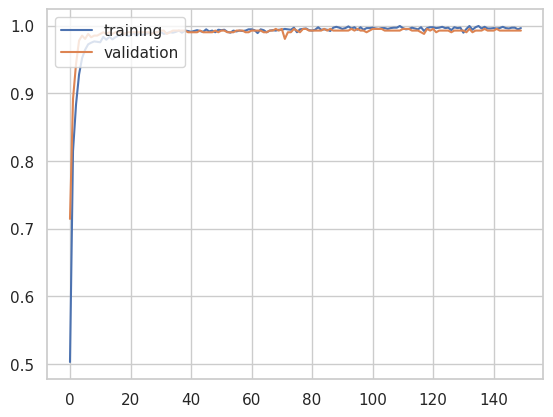

In [ ]:
plt.plot(dnn_model.history['accuracy'])  # Training accuracy
plt.plot(dnn_model.history['val_accuracy'])  # Validation accuracy
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [ ]:
classification_rep = classification_report(y_test_conv, y_pred_dnn_conv)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        80
           3       1.00      1.00      1.00       134
           4       1.00      1.00      1.00        98
           5       1.00      1.00      1.00        60
           6       0.86      0.92      0.89        13
           7       0.00      0.00      0.00         2

    accuracy                           0.99       406
   macro avg       0.86      0.87      0.86       406
weighted avg       0.99      0.99      0.99       406



## 6. Experimental results and comparison with existing approaches

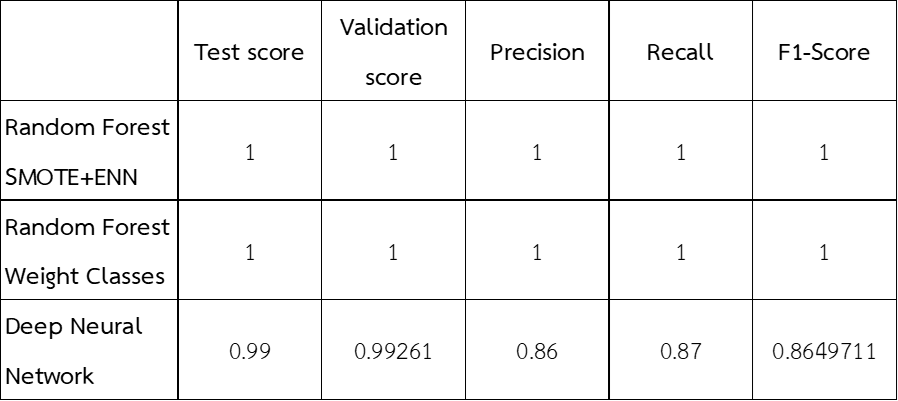

## 7. Discussion and Conclusion

ในการจัดการกับปัญหา Multiple Classification ซึ่งมีลักษณะเป็น Imbalanced Classification

พบว่าในการจัดการข้อมูล บางคลาสมีจำนวนของ Sample ที่ค่อนข้างน้อยมาก ทำให้ต้องทำการรวมกลุ่ม (Grouping) ใหม่ เพื่อให้จำนวนข้อมูลในคลาสนั้นๆมีเพิ่มมากขึ้น รวมทั้งเมื่อทำการแบ่งข้อมูลออกเป็น Training Set และ Testing Set ข้อมูลในบางคลาสมีค่อนข้างน้อย ได้แก่คลาส AAA และ Unrank ทำให้โมเดลที่เลือกใช้ จึงต้องใช้โมเดลที่สามารถทำการปรับค่าน้ำหนักได้ของแต่ละคลาสได้

ในการทำโมเดลทั้ง 3 ชนิด พบว่าโมเดล Random Forest SMOTE+ENN และ Random Forest Weight Classes มีความแม่นยำมาก แต่มีข้อสังเกตคือ จำนวน Testing Set มีจำนวนค่อนข้างน้อย จึงไม่สามารถระบุได้ว่า ถ้าเอาโมเดลนี้ไปใช้งานจริง จะยังคงรักษาประสิทธิภาพได้หรือไม่

ในขณะที่โมเดล Deep Neural Network มีค่า Recall ในคลาส 7 (Unrank) เท่ากับ 0 หรือ กล่าวคือ ปล่อยให้คลาสนี้ กลายเป็นคลาสอื่น ซึ่งเป็นสิ่งที่อาจก่อให้เกิดความเสียหายในการใช้งานจริงได้ โดยมีข้อสังเกตุคือ โมเดลนี้อาจต้องการข้อมูลในส่วนของ Training Set และ Testing Set เพิ่ม เพื่อให้โมเดลสามารถเรียนรู้และเข้าใจข้อมูลได้มากขึ้น

กล่าวโดยสรุปคือ จากโมเดลทั้ง 3 ชนิด โมเดล Random Forest SMOTE+ENN และ Random Forest Weight Classes มีความแม่นยำมากที่สุด ซึ่งอาจบอกได้ว่า เป็นโมเดลที่เหมาะกับงานในการจัดการปัญหา Multiple Classification ในข้อนี้มากที่สุด
